In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json

In [2]:

#todo lr epoch decay get it from json (mlflow metrics updated)
reportedGithubValueF1=0.7766
dataset = 'RAPzs/'
dirTest = 'testOKGithub2/'

pathToJson = dataset+dirTest

pathToTestingOverall = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson+'/testing_metrics.json'
pathToTrainingOverall =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson+'/training_metrics.json'
tittle=dataset+' Training vs testing F1'


fileTestingOverall = open(pathToTestingOverall)
jsonTestingOverall = json.load(fileTestingOverall)

fileTrainingOverall = open(pathToTrainingOverall)
jsonTrainingOverall = json.load(fileTrainingOverall)

#jsonTrainingOverall['lr']

lrDecay = 0.00001
#lrEpochDecay = jsonTrainingOverall['lr'].index(lrDecay)
lrEpochDecay = 11

f1Key='f1'
listF1Testing = jsonTestingOverall['f1']
listF1Training = jsonTrainingOverall['f1']

def plotTrainingVsTesting(listTraining, listTesting, tittle, lrDecay, reportedValue):
    epochs=len(listTraining)
    plt.plot(range(0,epochs), listTraining, label='training F1')
    plt.plot(range(0,epochs), listTesting, label='training F1')

    plt.plot(lrDecay, listTraining[lrDecay], 'o', color='r', label='learning decay epoch - '+str(lrDecay))
    plt.text(s=str(round(listTraining[lrDecay],2)), x=lrDecay, y=listTraining[lrDecay])
    
    
    plt.plot(lrDecay, listTesting[lrDecay], 'o', color='r')
    plt.text(s=str(round(listTesting[lrDecay],2)), x=lrDecay, y=listTesting[lrDecay])

    plt.plot(lrDecay, reportedValue, 'x', color='g', label='reported value')
    plt.text(s=str(reportedValue)+' github value', x=lrDecay, y=reportedValue-0.01)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

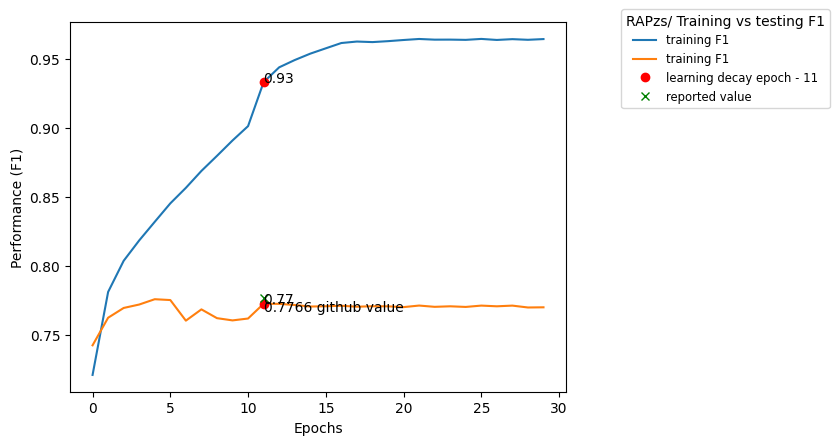

In [3]:
plotTrainingVsTesting(listF1Training, listF1Testing, tittle, lrEpochDecay, reportedGithubValueF1)

In [4]:
pathToTestingLabels = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson+'/testing_metrics_labels.json'
pathToTrainingLabels =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson+'/training_metrics_labels.json'

fileTestingLabels = open(pathToTestingLabels)
jsonTestingLabels = json.load(fileTestingLabels)

fileTrainingLabels = open(pathToTrainingLabels)
jsonTrainingLabels = json.load(fileTrainingLabels)

def SortByPerformanceBestStep(sub_li, step):
    return(sorted(sub_li, key=lambda x: x[step], reverse =True))

f1Key='f1'
listTestingLabelsKeys = [key for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]
listTestingLabelsPerformance = [value for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]

listTestingLabelsPerformance=SortByPerformanceBestStep(listTestingLabelsPerformance, lrEpochDecay)

listTrainingLabelsKeys = [key for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]
listTrainingLabelsPerformance = [value for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]

listTrainingLabelsPerformance=SortByPerformanceBestStep(listTrainingLabelsPerformance, lrEpochDecay)

medium = 0.4
good = 0.85
step = lrEpochDecay

def plotAttributesJson(listAttr, listPerformance, tittle,step):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        classes.append( attribute + " - {:.2f}".format(performance[step]))
        plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=3, fontsize='small', fancybox=True)
    plt.show()

def plotAttributesJsonInterval(listAttr, listPerformance, tittle, step, floor, ceil):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        if valuesY[step] >=floor and valuesY[step]<ceil:
            classes.append( attribute + " - {:.2f}".format(performance[step]))
            plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=2, fontsize='small', fancybox=True)
    plt.show()

In [5]:
columns = ['attribute','training_ma','testing_ma', 'training_f1', 'testing_f1', 'training_acc', 'testing_acc']
metrics = ['ma', 'f1', 'acc']
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Femal','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
# from preprocess rethinking
listAttributesRAPv2.remove('Age46-60')
listAttributesRAPzs = listAttributesRAPv2
listData = []
for attrib in listAttributesRAPzs:
    listMetric=[]
    listMetric.append(attrib)
    for metric in metrics:
        valueTrain = jsonTrainingLabels[metric+"_"+attrib][step]
        valueTest = jsonTestingLabels[metric+"_"+attrib][step]
        listMetric.append(valueTrain)
        listMetric.append(valueTest)
    listData.append(listMetric)


df_attrib_values = pd.DataFrame(data=listData, columns=columns)
pathToSave=dataset+dirTest+"attributesWithValues.csv"
df_attrib_values.to_csv(pathToSave)

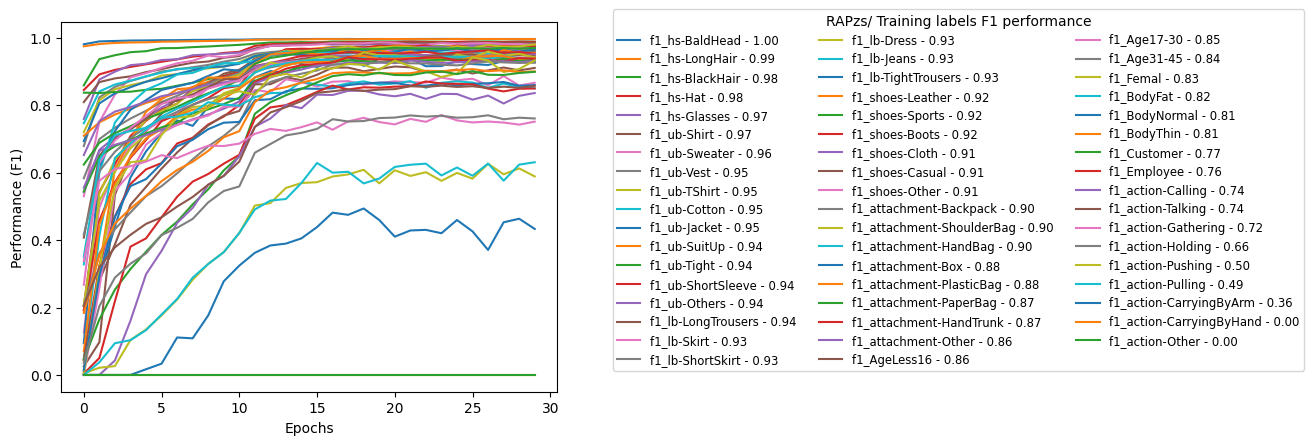

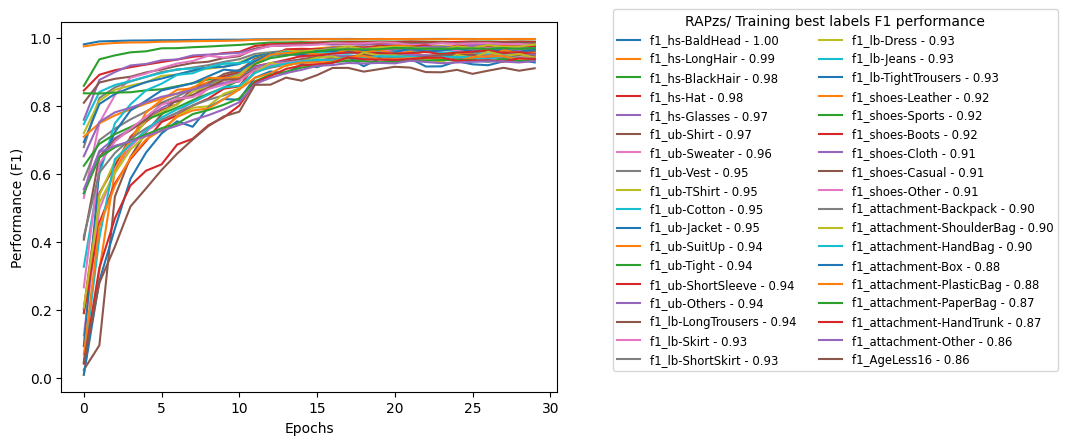

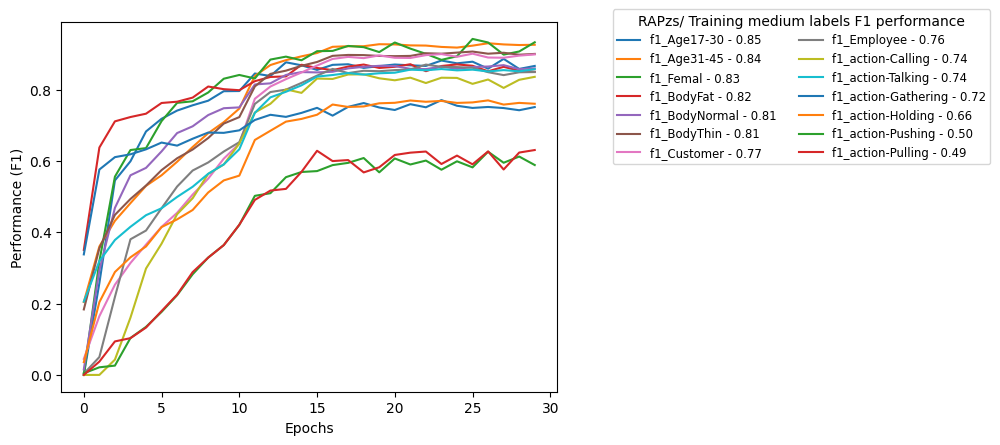

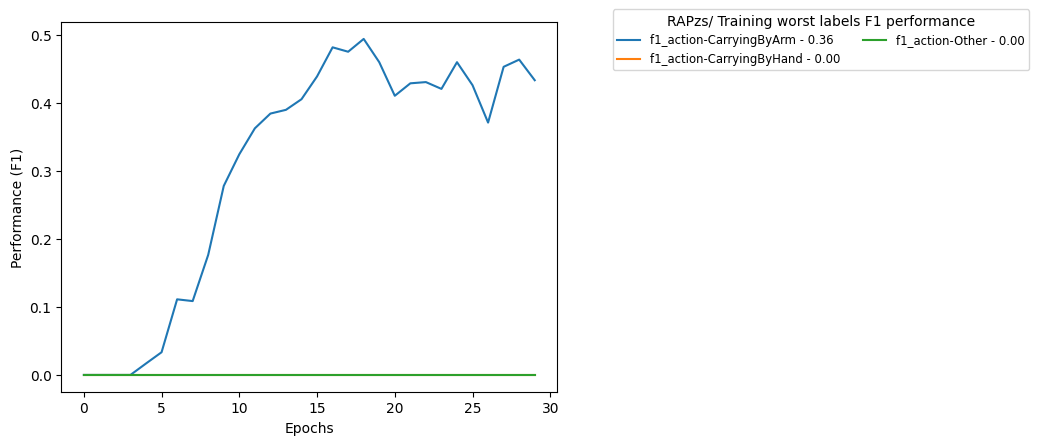

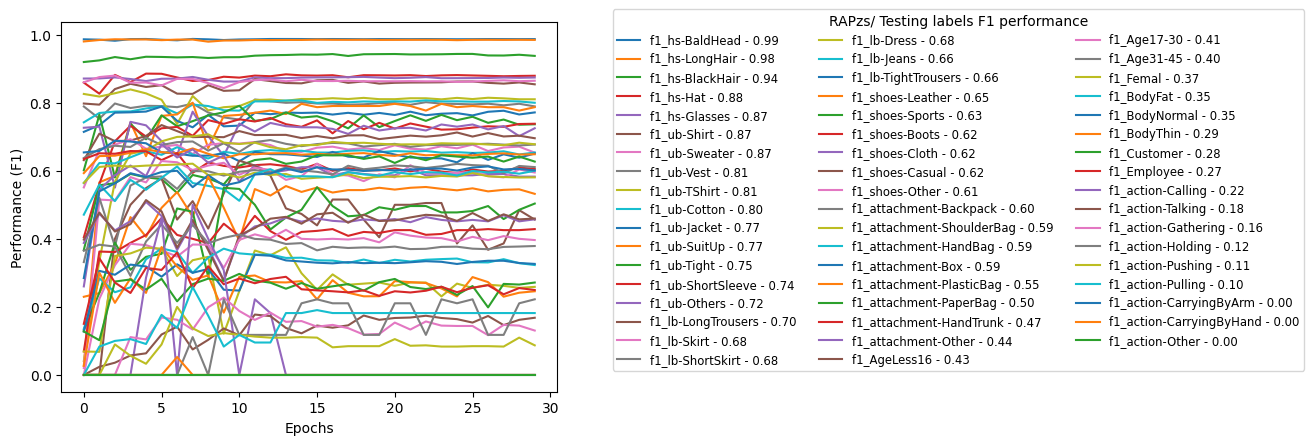

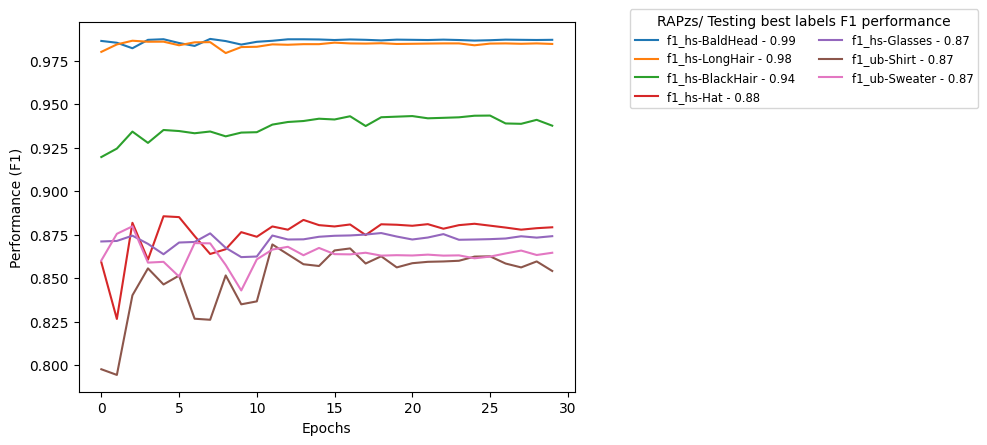

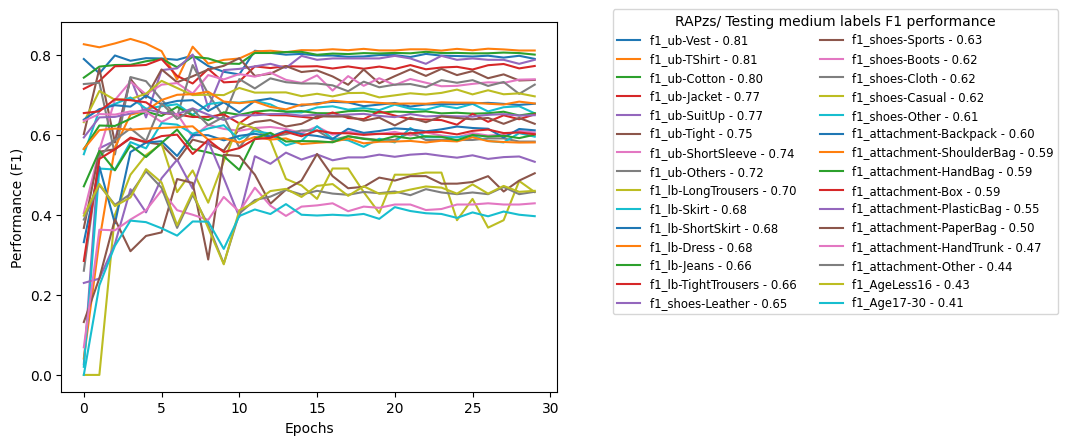

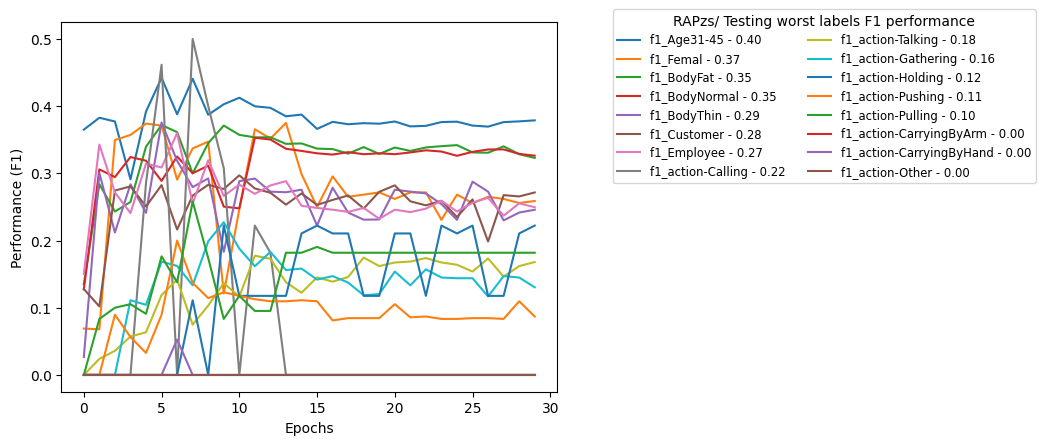

In [35]:
tittle=dataset+" Training labels F1 performance"
plotAttributesJson(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step)

tittle=dataset+" Training best labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Training medium labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Training worst labels F1 performance"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=0, ceil=medium)

tittle=dataset+" Testing labels F1 performance"
plotAttributesJson(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step)

tittle=dataset+" Testing best labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Testing medium labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Testing worst labels F1 performance"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=0, ceil=medium)

In [36]:
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_f1.csv'

pathToF1Ttraining = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_training_f1.csv'

In [37]:
training_dt_f1 = pd.read_csv(pathToF1Ttraining, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)

In [38]:
#training_dt_f1 = training_dt_f1.sort_values(by='value', ascending=True)
#test_dt_f1 = test_dt_f1.sort_values(by='value', ascending=True)

In [39]:
intervalTraining = training_dt_f1[training_dt_f1['step'] == step].sort_values(by='value', ascending=True)
listAttributesTraining = list(intervalTraining['key'])

intervalTesting = test_dt_f1[test_dt_f1['step'] == step].sort_values(by='value', ascending=True)
listAttributesTesting = list(intervalTesting['key'])

In [40]:
intervalBadTraining = training_dt_f1[(training_dt_f1['value'] <= medium) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTraining = list(intervalBadTraining['key'])
listBadAttributesTraining.remove('learning_rate_605')
listBadAttributesTrainingPerformance = list(intervalBadTraining['value'])

intervalMediumTraining = training_dt_f1[(training_dt_f1['value'] > medium) & (training_dt_f1['value'] <= good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTraining = list(intervalMediumTraining['key'])
listMediumAttributesTrainingPerformance = list(intervalMediumTraining['value'])


intervalGoodTraining = training_dt_f1[(training_dt_f1['value'] > good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTraining = list(intervalGoodTraining['key'])
listGoodAttributesTrainingPerformance = list(intervalGoodTraining['value'])

In [41]:
def plotAttributes(listAttr, ds, listPerformance, tittle):
    for attribute in listAttr:
        valuesX = list(ds[ds['key'] == attribute]['value'])
        valuesY = list(ds[ds['key'] == attribute]['step'])
        plt.plot(valuesY, valuesX)
    
    classes = []
    for attrib, performance in zip(listAttr, listPerformance):
        classes.append( attrib + " - {:.2f}".format(performance))

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

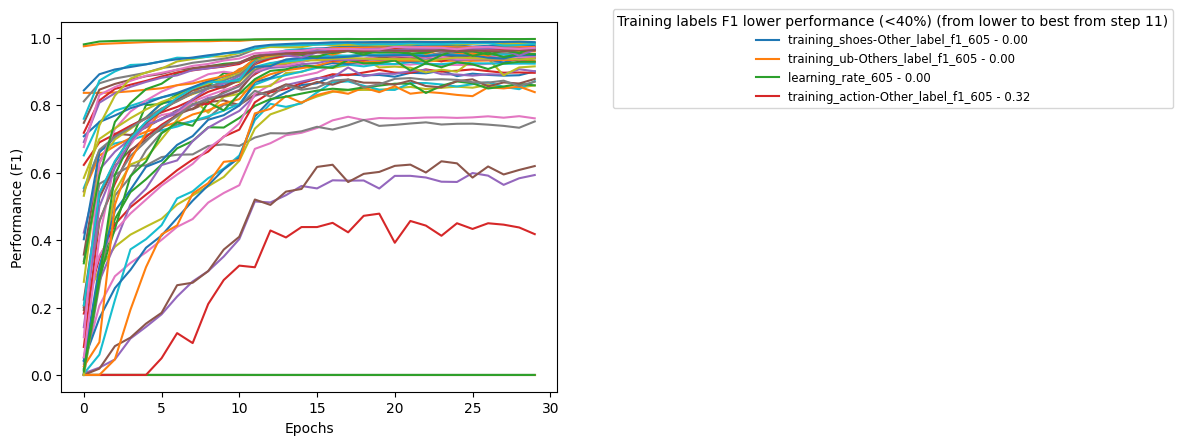

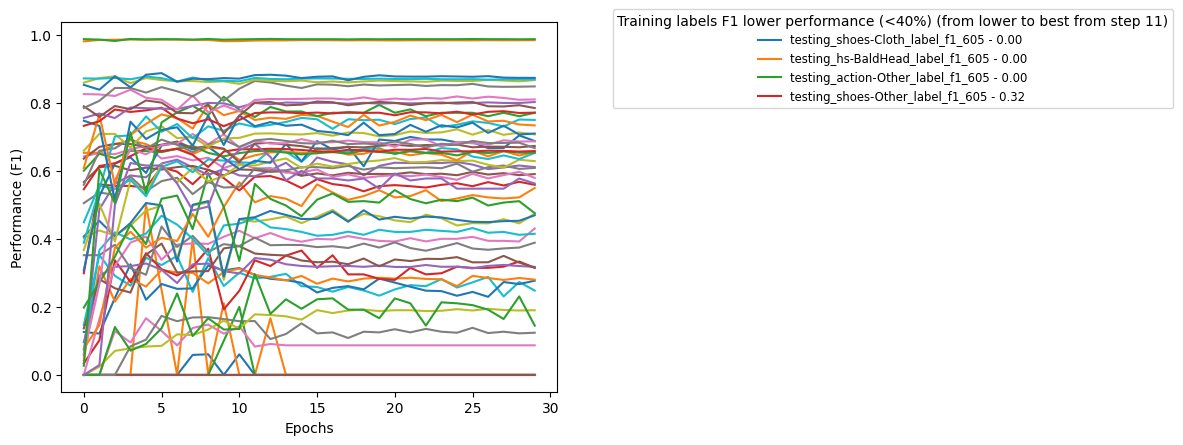

In [42]:
plotAttributes(listAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listAttributesTesting, test_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))


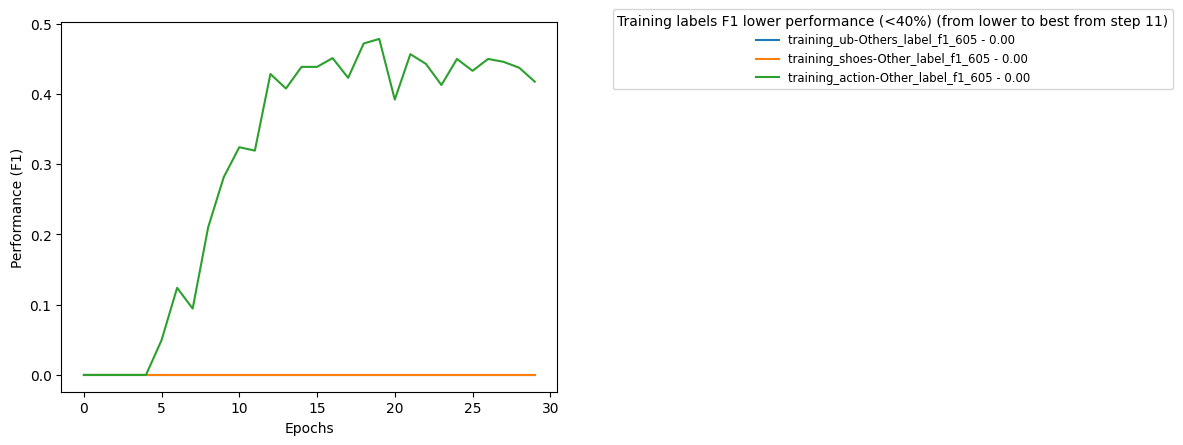

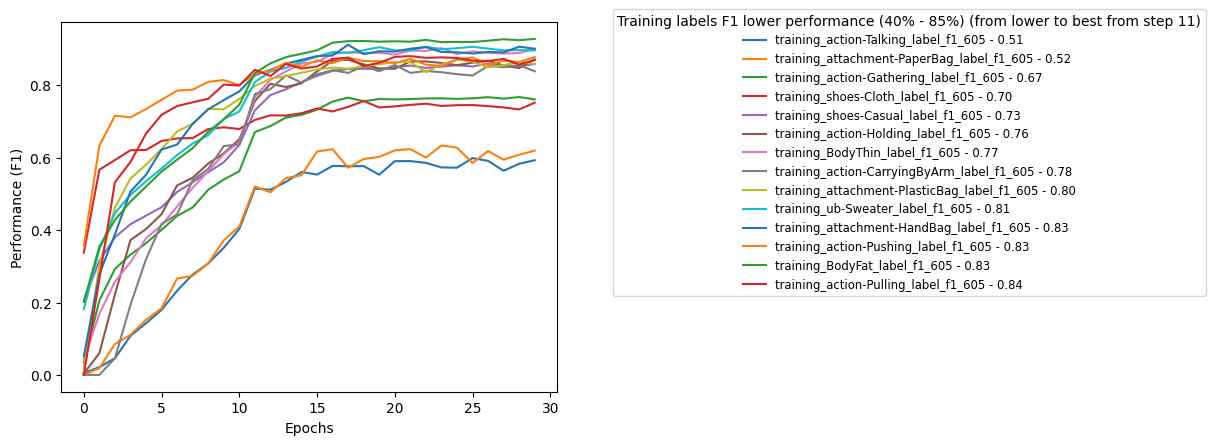

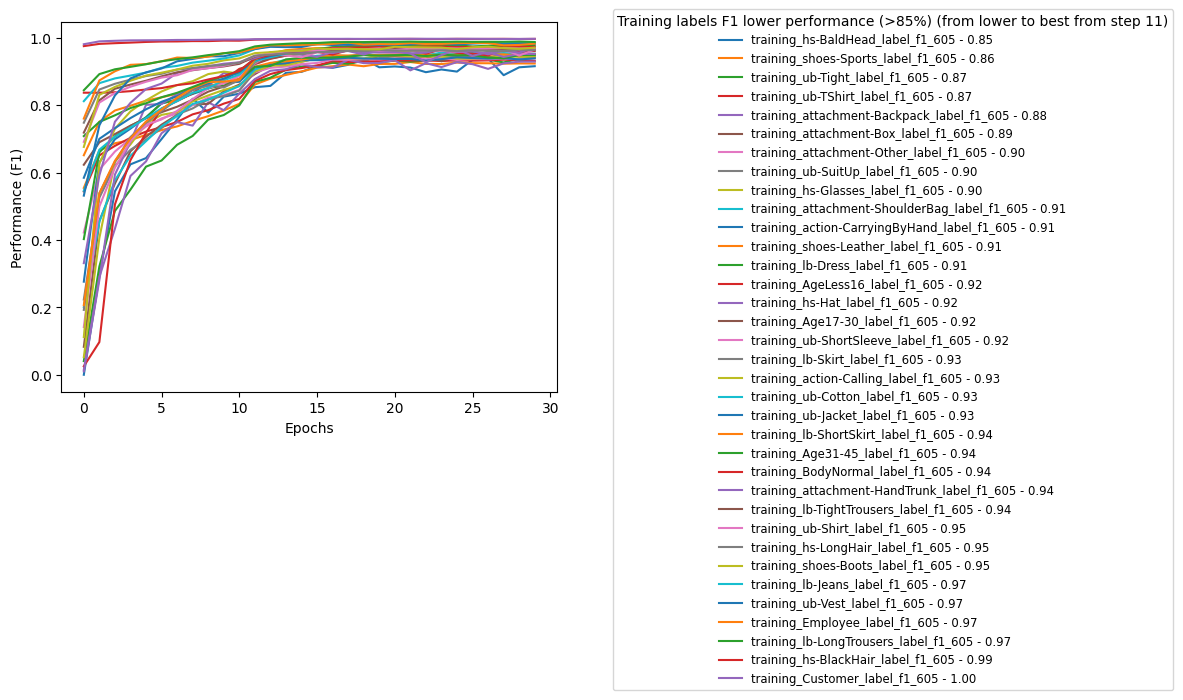

In [43]:
plotAttributes(listBadAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTraining, training_dt_f1, listMediumAttributesTrainingPerformance, "Training labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTraining, training_dt_f1, listGoodAttributesTrainingPerformance, "Training labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [44]:
intervalBadTesting = test_dt_f1[(test_dt_f1['value'] <= medium) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTesting = list(intervalBadTesting['key'])
listBadAttributesTesting.remove('learning_rate_605')
listBadAttributesTestingPerformance = list(intervalBadTesting['value'])

intervalMediumTesting = test_dt_f1[(test_dt_f1['value'] > medium) & (test_dt_f1['value'] <= good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTesting = list(intervalMediumTesting['key'])
listMediumAttributesTestingPerformance = list(intervalMediumTesting['value'])

intervalGoodTesting = test_dt_f1[(test_dt_f1['value'] > good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTesting = list(intervalGoodTesting['key'])
listGoodAttributesTestingPerformance = list(intervalGoodTesting['value'])

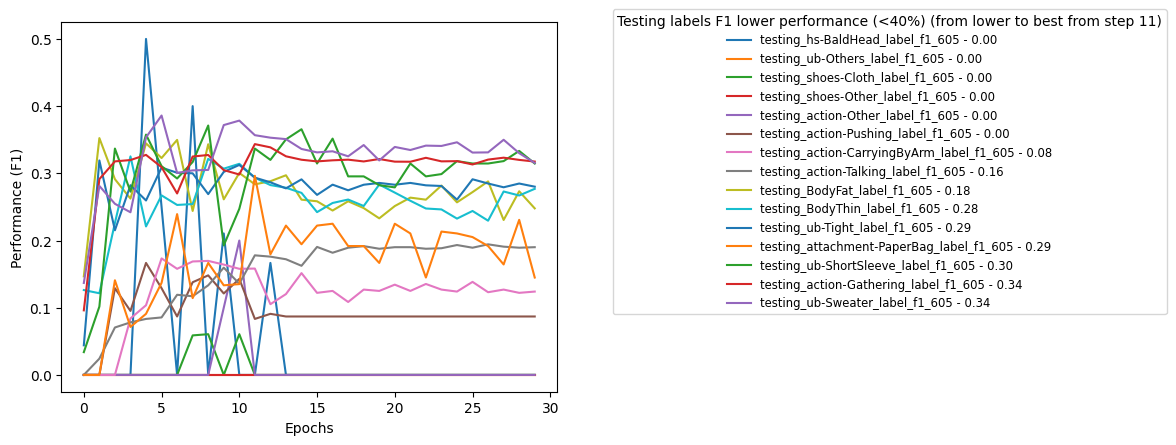

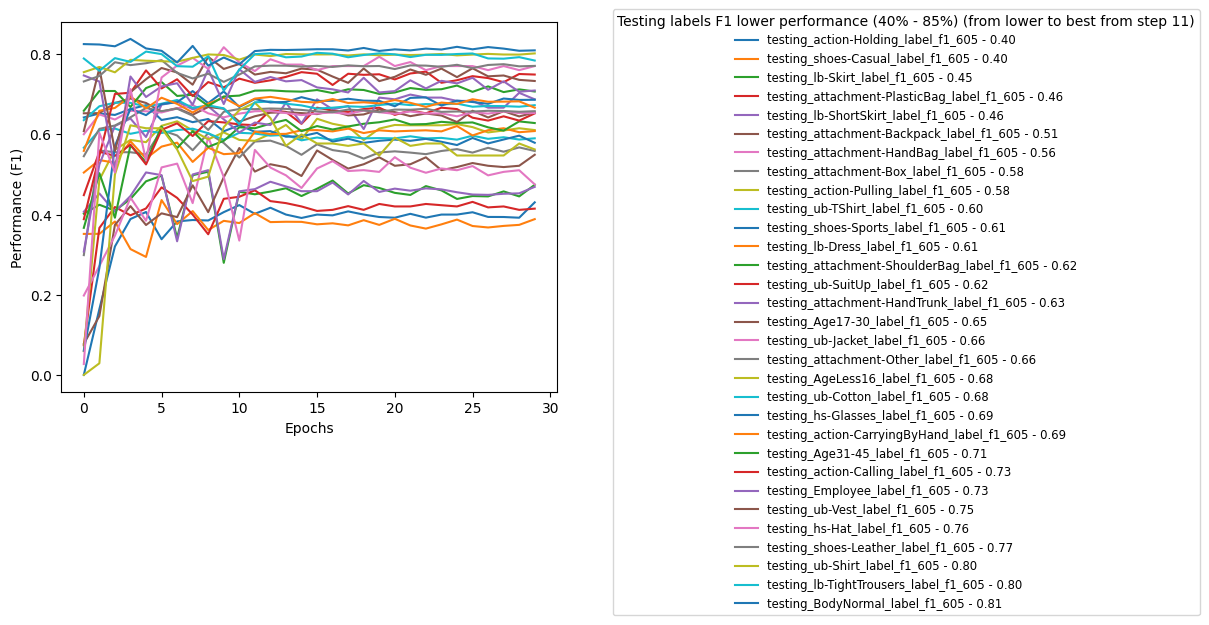

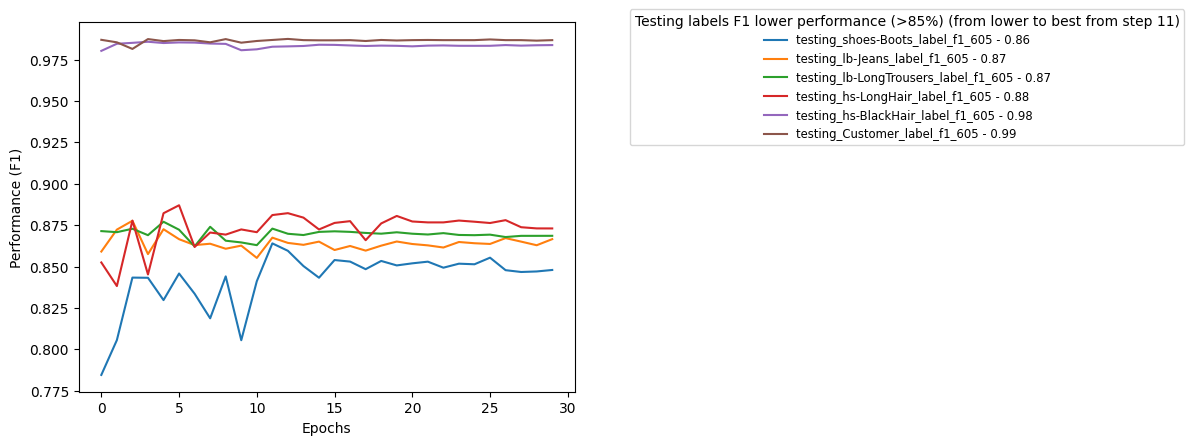

In [45]:
plotAttributes(listBadAttributesTesting, test_dt_f1, listBadAttributesTestingPerformance, "Testing labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTesting, test_dt_f1, listMediumAttributesTestingPerformance, "Testing labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTesting, test_dt_f1, listGoodAttributesTestingPerformance, "Testing labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [17]:
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

In [18]:
tablaBadTesting = pd.DataFrame()
listBadAttributesTestingPerformance.remove(listBadAttributesTestingPerformance[0])
tablaBadTesting['attributes'] = listBadAttributesTesting
tablaBadTesting['performance'] = listBadAttributesTestingPerformance
tablaMediumTesting = pd.DataFrame()
tablaMediumTesting['attributes'] = listMediumAttributesTesting
tablaMediumTesting['performance'] = listMediumAttributesTestingPerformance
tablaGoodTesting = pd.DataFrame()
tablaGoodTesting['attributes'] = listGoodAttributesTesting
tablaGoodTesting['performance'] = listGoodAttributesTestingPerformance

tablaBadTraining = pd.DataFrame()
listBadAttributesTrainingPerformance.remove(listBadAttributesTrainingPerformance[0])
tablaBadTraining['attributes'] = listBadAttributesTraining
tablaBadTraining['performance'] = listBadAttributesTrainingPerformance

tablaMediumTraining = pd.DataFrame()
tablaMediumTraining['attributes'] = listMediumAttributesTraining
tablaMediumTraining['performance'] = listMediumAttributesTrainingPerformance

tablaGoodTraining = pd.DataFrame()
tablaGoodTraining['attributes'] = listGoodAttributesTraining
tablaGoodTraining['performance'] = listGoodAttributesTrainingPerformance

listPerfoTraining=[]
listPerfoTesting=[]
for attributeReal in listAttributesRAPzs:
    
    for attributeTraining in listBadAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listBadAttributesTrainingPerformance[listBadAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listMediumAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listMediumAttributesTrainingPerformance[listMediumAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listGoodAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listGoodAttributesTrainingPerformance[listGoodAttributesTraining.index(attributeTraining)]

    for attributeTesting in listBadAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listBadAttributesTestingPerformance[listBadAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listMediumAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listMediumAttributesTestingPerformance[listMediumAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listGoodAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listGoodAttributesTestingPerformance[listGoodAttributesTesting.index(attributeTesting)]
    
    listPerfoTraining.append(perfoTraining)
    listPerfoTesting.append(perfoTesting)



tablaAll = pd.DataFrame({'attribute': listAttributesRAPzs,
     'perfo training (F1)': listPerfoTraining,
     'perfo testing (F1)': listPerfoTesting
    })

In [19]:
tablaBadTraining

,attributes,performance
0,training_ub-Others_label_f1_605,0.000000
1,training_shoes-Other_label_f1_605,0.000100
2,training_action-Other_label_f1_605,0.324324


In [20]:
tablaBadTesting

,attributes,performance
0,testing_shoes-Other_label_f1_605,0.000000
1,testing_hs-BaldHead_label_f1_605,0.000000
2,testing_ub-Others_label_f1_605,0.000100
3,testing_shoes-Cloth_label_f1_605,0.060606
4,testing_attachment-PaperBag_label_f1_605,0.135135
5,testing_action-Talking_label_f1_605,0.135747
6,testing_action-Pushing_label_f1_605,0.142857
7,testing_action-CarryingByArm_label_f1_605,0.157895
8,testing_action-Other_label_f1_605,0.200000
9,testing_ub-ShortSleeve_label_f1_605,0.247191


In [21]:
tablaMediumTraining

,attributes,performance
0,training_action-Talking_label_f1_605,0.403114
1,training_attachment-PaperBag_label_f1_605,0.409938
2,training_action-Gathering_label_f1_605,0.562868
3,training_shoes-Casual_label_f1_605,0.635408
4,training_action-CarryingByArm_label_f1_605,0.637188
5,training_BodyThin_label_f1_605,0.644483
6,training_action-Holding_label_f1_605,0.650934
7,training_shoes-Cloth_label_f1_605,0.679335
8,training_ub-Sweater_label_f1_605,0.727806
9,training_BodyFat_label_f1_605,0.746312


In [22]:
tablaMediumTesting

,attributes,performance
0,testing_action-Holding_label_f1_605,0.423645
1,testing_attachment-PlasticBag_label_f1_605,0.444444
2,testing_lb-Skirt_label_f1_605,0.456929
3,testing_lb-ShortSkirt_label_f1_605,0.458015
4,testing_attachment-Box_label_f1_605,0.542274
5,testing_lb-Dress_label_f1_605,0.553030
6,testing_attachment-Backpack_label_f1_605,0.566038
7,testing_action-Pulling_label_f1_605,0.586207
8,testing_ub-TShirt_label_f1_605,0.604017
9,testing_attachment-HandTrunk_label_f1_605,0.604651


In [23]:
tablaGoodTraining

,attributes,performance
0,training_attachment-ShoulderBag_label_f1_605,0.856544
1,training_hs-Glasses_label_f1_605,0.856942
2,training_attachment-Box_label_f1_605,0.860853
3,training_action-CarryingByHand_label_f1_605,0.869332
4,training_lb-ShortSkirt_label_f1_605,0.874342
5,training_lb-Skirt_label_f1_605,0.875000
6,training_lb-Dress_label_f1_605,0.875128
7,training_Age17-30_label_f1_605,0.875183
8,training_shoes-Leather_label_f1_605,0.879100
9,training_ub-ShortSleeve_label_f1_605,0.886574


In [24]:
tablaGoodTesting

,attributes,performance
0,testing_lb-Jeans_label_f1_605,0.855211
1,testing_lb-LongTrousers_label_f1_605,0.862908
2,testing_hs-LongHair_label_f1_605,0.870737
3,testing_hs-BlackHair_label_f1_605,0.981204
4,testing_Customer_label_f1_605,0.986231


In [25]:
import pickle
import easydict

fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)

maxAttributes = len(listAttributesRAPzs)
listTrainingCount = dataset.label[dataset.partition.train][:,:maxAttributes].sum(axis=0).tolist()
listTestingCount = dataset.label[dataset.partition.test][:,:maxAttributes].sum(axis=0).tolist()

In [26]:
tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount

In [27]:
tablaAll.sort_values(by='perfo testing (F1)')

,attribute,perfo training (F1),perfo testing (F1),training count,testing count
0,hs-BaldHead,0.834081,0.000000,105,6
26,shoes-Other,0.000100,0.000000,7,2
14,ub-Others,0.000000,0.000100,32,6
24,shoes-Cloth,0.679335,0.060606,239,25
32,attachment-PaperBag,0.409938,0.135135,153,54
46,action-Talking,0.403114,0.135747,552,155
49,action-Pushing,0.800578,0.142857,231,18
51,action-CarryingByArm,0.637188,0.157895,382,89
53,action-Other,0.324324,0.200000,99,16
13,ub-ShortSleeve,0.886574,0.247191,397,54


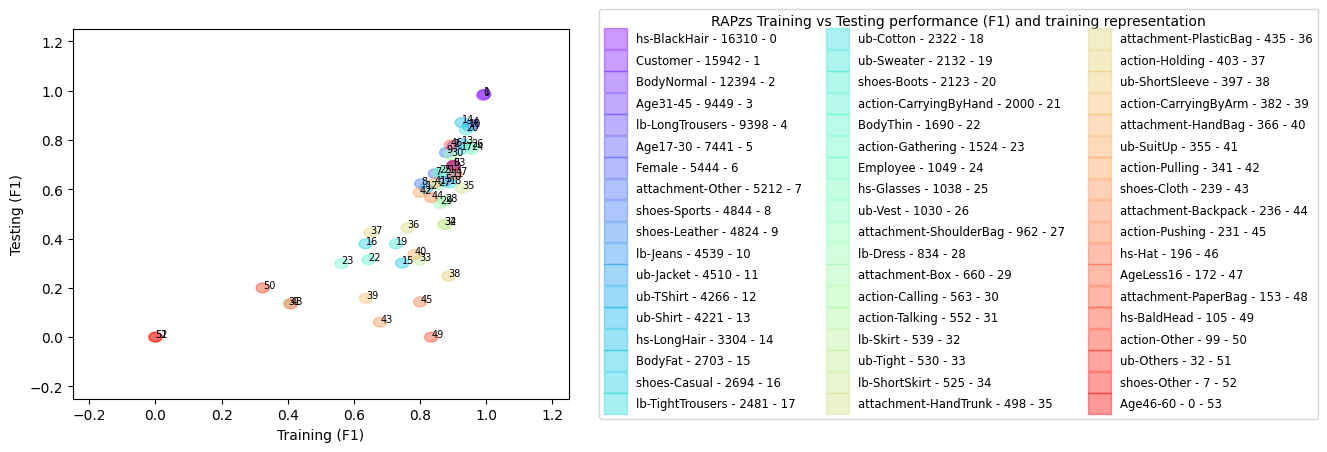

In [47]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 1.0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



listText = []
circlesList = []
cont = 0
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)

    #plt.plot([xText, x], [yText, y], '-', color=c, linewidth = '0.2')
    plt.text(x.values[0], y.values[0], str(cont), fontsize=7)


    circle = plt.Circle((x.values[0], y.values[0]), 0.02, color=c, alpha=0.4, label=newAttribute+" - "+str(cont))
    
    circlesList.append(circle)
    cont += 1


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance (F1) and training representation'
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training (F1)')
plt.ylabel('Testing (F1)')
plt.show()

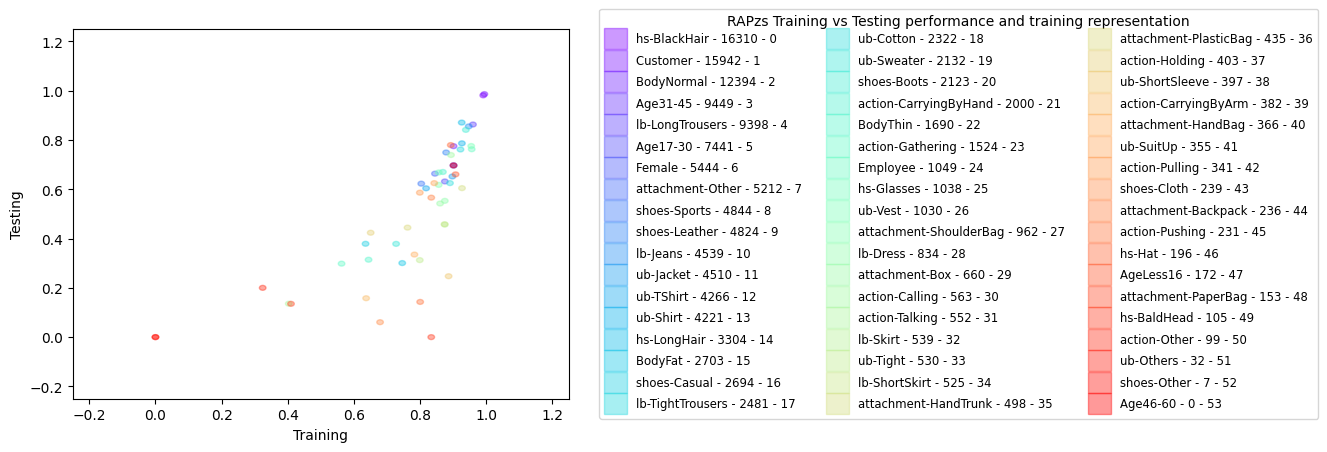

In [37]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



circlesList = []
cont = 0
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)
    #circle = plt.Circle((x.values[0], y.values[0]), count, color=c, alpha=0.4, label=newAttribute)
    circle = plt.Circle((x.values[0], y.values[0]), 0.01, color=c, alpha=0.4, label=newAttribute+" - "+str(cont))
    
    circlesList.append(circle)
    cont += 1


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance and training representation'
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training')
plt.ylabel('Testing')
plt.show()

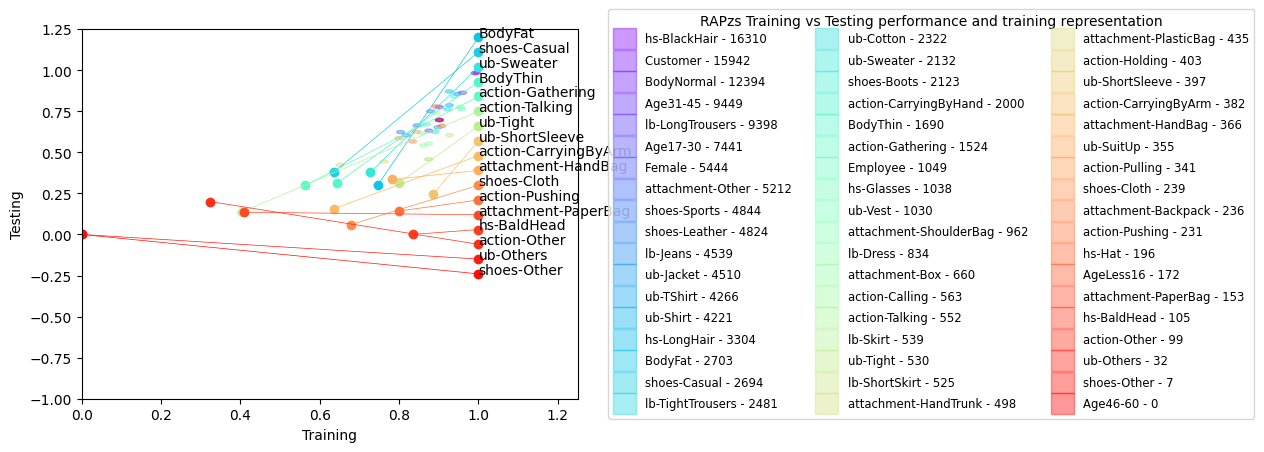

In [29]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 1.0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



circlesList = []
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)
    #circle = plt.Circle((x.values[0], y.values[0]), count, color=c, alpha=0.4, label=newAttribute)
    circle = plt.Circle((x.values[0], y.values[0]), 0.01, color=c, alpha=0.4, label=newAttribute)
    circlesList.append(circle)

    if y.values[0] < thresholdTesting:
        plt.plot([xText, x], [yText, y], '-o', color=c, linewidth = '0.5')

        plt.text(xText, yText, attribute)
        yText-=0.09



for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance and training representation'
plt.xlim(0,1.25)
plt.ylim(-1,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training')
plt.ylabel('Testing')
plt.show()

In [ ]:
##cambiar la grafica anterior